In [70]:
from tokenizer import Tokenizer
from data_layer import Image2LatexDataset, collate_fn, make_loader
from utils import clean_csvs
import pandas as pd
from IPython.display import display, Math
import matplotlib.pyplot as plt

In [71]:
clean_csvs()


Cleaning: ../data/train.csv
  → Kept:    56594
  → Removed: 18681
  Saved cleaned CSV to: ../data/cleaned_train.csv

Cleaning: ../data/test.csv
  → Kept:    7764
  → Removed: 2591
  Saved cleaned CSV to: ../data/cleaned_test.csv

Cleaning: ../data/val.csv
  → Kept:    6198
  → Removed: 2172
  Saved cleaned CSV to: ../data/cleaned_val.csv


# Tokenizer

In [72]:
df = pd.read_csv('../data/im2latex_formulas.norm.csv')
formulas = df['formulas'].tolist()

In [73]:
tokenizer = Tokenizer()
tokenizer.build_vocab(formulas)
print('Vocab size:', tokenizer.vocab_size)

Vocab size: 532


In [74]:
s = formulas[0]
ids = tokenizer.encode(s)
display('Original seq', Math(s))
print('ids:', ids)
display('Decoded seq', Math(tokenizer.decode(ids)))

'Original seq'

<IPython.core.display.Math object>

ids: [1, 70, 6, 5, 12, 100, 4, 7, 5, 118, 4, 24, 40, 159, 59, 5, 29, 4, 7, 5, 12, 40, 146, 4, 70, 6, 5, 12, 100, 4, 7, 5, 118, 4, 24, 40, 7, 5, 48, 4, 59, 5, 29, 4, 7, 5, 12, 40, 7, 5, 48, 4, 146, 4, 40, 40, 7, 5, 48, 4, 5, 16, 5, 40, 7, 5, 48, 4, 12, 40, 4, 5, 40, 15, 40, 7, 5, 48, 4, 4, 4, 113, 35, 25, 64, 7, 5, 48, 48, 4, 8, 40, 9, 12, 5, 16, 5, 35, 4, 5, 44, 4, 4, 36, 25, 64, 8, 40, 9, 119, 13, 19, 23, 2]


'Decoded seq'

<IPython.core.display.Math object>

# Data Layer

In [75]:
train_loader = make_loader(
  csv_path = '../data/cleaned_train.csv',
  root_dir = '../data/images',
  tokenizer = tokenizer,
  batch_size = 32,
  shuffle = True,
  img_height = 128
)

In [76]:
batch = next(iter(train_loader))

In [77]:
def visualize_batch(batch, tokenizer, max_items=10):
    images      = batch["images"]
    input_ids   = batch["input_ids"]
    target_ids  = batch["target_ids"]
    formulas    = batch["formulas"]

    B = images.shape[0]
    n = min(B, max_items)

    pad_id = tokenizer.token2id[tokenizer.pad_token]

    def strip_pad(seq):
        if pad_id in seq:
            return seq[:seq.index(pad_id)]
        return seq

    cols = 5
    rows = (n + cols - 1) // cols
    plt.figure(figsize=(cols * 3, rows * 3))

    for i in range(n):
        img = images[i].squeeze(0).cpu().numpy()

        plt.subplot(rows, cols, i+1)
        plt.imshow(img, cmap="gray")
        plt.axis("off")
        plt.title(f"Item {i}")

    plt.suptitle("Batch Images")
    plt.tight_layout()
    plt.show()

    for i in range(n):
        in_ids_list  = strip_pad(input_ids[i].cpu().tolist())
        tgt_ids_list = strip_pad(target_ids[i].cpu().tolist())

        decoded_in   = tokenizer.decode(in_ids_list, remove_special=True)
        decoded_tgt  = tokenizer.decode(tgt_ids_list, remove_special=True)

        print("\n==============================")
        print(f"Item {i}")
        print("Formula:         ", formulas[i])
        print("Input IDs:       ", in_ids_list)
        print("Decoded input:   ", decoded_in)
        print("Target IDs:      ", tgt_ids_list)
        print("Decoded target:  ", decoded_tgt)
    print("==============================\n")


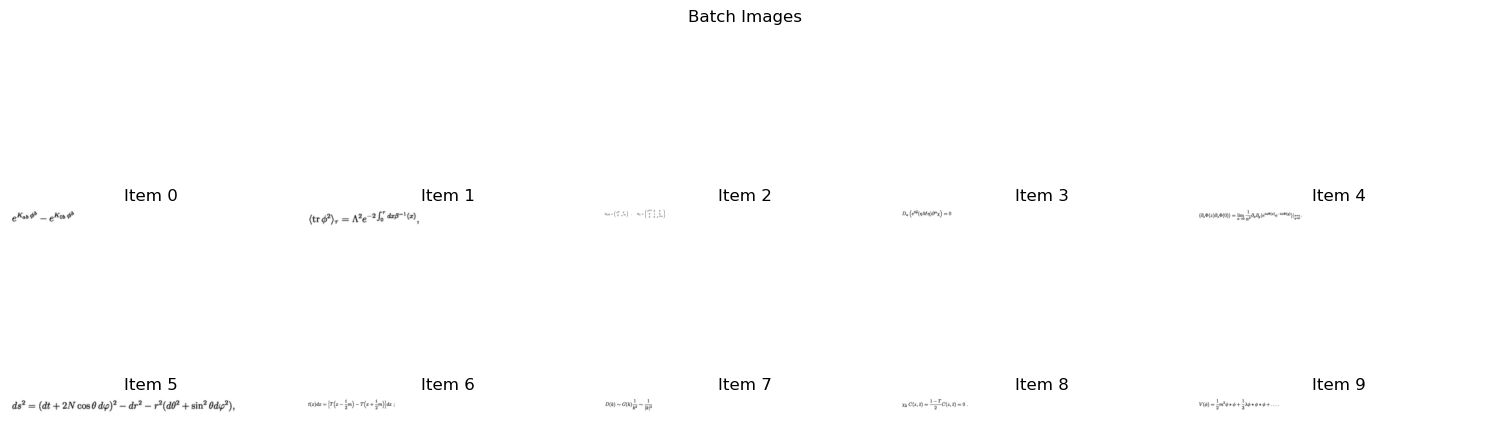


Item 0
Formula:          e ^ { K _ { a b } \, \phi ^ { b } } - e ^ { K _ { 0 b } \, \phi ^ { b } }
Input IDs:        [1, 29, 7, 5, 117, 6, 5, 17, 56, 4, 25, 57, 7, 5, 56, 4, 4, 12, 29, 7, 5, 117, 6, 5, 19, 56, 4, 25, 57, 7, 5, 56, 4, 4]
Decoded input:    e^{K_{ab}\,\phi^{b}}-e^{K_{0b}\,\phi^{b}}
Target IDs:       [29, 7, 5, 117, 6, 5, 17, 56, 4, 25, 57, 7, 5, 56, 4, 4, 12, 29, 7, 5, 117, 6, 5, 19, 56, 4, 25, 57, 7, 5, 56, 4, 4, 2]
Decoded target:   e^{K_{ab}\,\phi^{b}}-e^{K_{0b}\,\phi^{b}}

Item 1
Formula:          \langle \mathrm { t r } \, \phi ^ { 2 } \rangle _ { \tau } = \Lambda ^ { 2 } e ^ { - 2 \int _ { 0 } ^ { \tau } { d x \beta ^ { - 1 } ( x ) } } ,
Input IDs:        [1, 141, 59, 5, 36, 20, 4, 25, 57, 7, 5, 10, 4, 122, 6, 5, 92, 4, 13, 126, 7, 5, 10, 4, 29, 7, 5, 12, 10, 70, 6, 5, 19, 4, 7, 5, 92, 4, 5, 24, 21, 67, 7, 5, 12, 11, 4, 8, 21, 9, 4, 4, 14]
Decoded input:    \langle\mathrm{tr}\,\phi^{2}\rangle_{\tau}=\Lambda^{2}e^{-2\int_{0}^{\tau}{dx\beta^{-1}(x)}},
Target IDs:    

In [78]:
visualize_batch(batch, tokenizer, max_items = 10)